In [39]:
!pip install pandas

In [40]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
dp = pd.read_csv('/content/nasdaq100.csv', sep = ';')

In [43]:
dp.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [44]:
dp = dp.drop(columns = ['Date'])

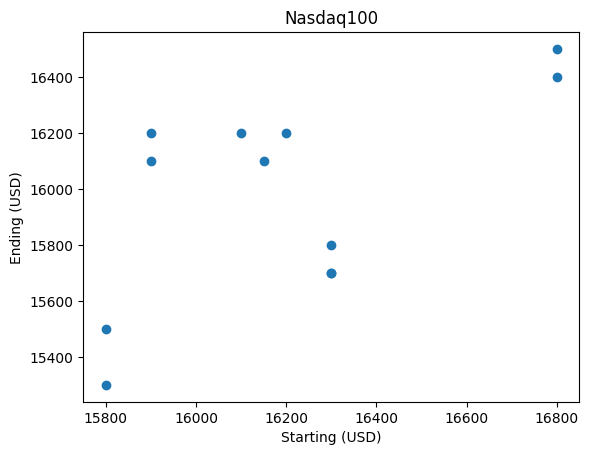

In [45]:
plt.scatter(dp['Starting (USD)'],dp['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Nasdaq100')
plt.show()

In [46]:
x = dp.drop('Ending (USD)', axis=1)

In [47]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [48]:
y = dp[['Ending (USD)']]

In [49]:
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression()

In [53]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [54]:
y.mean()

Ending (USD)    15975.0
dtype: float64

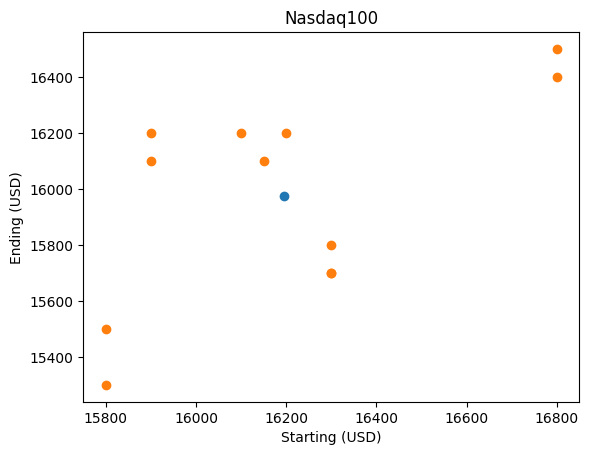

In [55]:
plt.scatter(x.mean(),y.mean( ))
plt.scatter(dp['Starting (USD)'],dp['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Nasdaq100')
plt.show()

In [56]:
reg.fit(x,y)

LinearRegression()

In [58]:
m= reg.coef_
m

array([[0.65258293]])

In [59]:
c= reg.intercept_
c

array([5405.87555702])

In [60]:
m*16700+c

array([[16304.0105628]])

In [62]:
reg.predict([[16700]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [63]:
dp['predicted_y'] = reg.predict(x)
dp.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


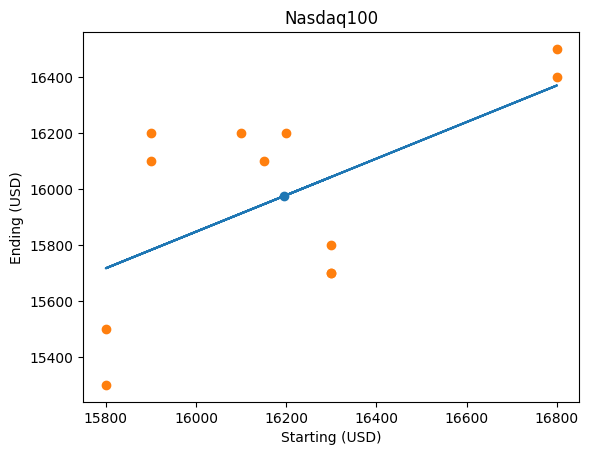

In [65]:
plt.plot(x,dp['predicted_y'])
plt.scatter(x.mean(),y.mean( ))
plt.scatter(dp['Starting (USD)'],dp['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Nasdaq100')
plt.show()

# New Section